In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data/full_movie_data.csv')

In [4]:
df.isnull().sum()

Rank                   0
date                   0
primaryTitle_x         0
budget                 0
domestic_gross         0
world_gross            0
year                   0
name_id_x              0
matched_name         968
tconst                 0
titleType              0
primaryTitle_y       968
originalTitle        968
isAdult                0
startYear              0
endYear                0
runtimeMinutes         0
genres                 0
averageRating          0
numVotes               0
nconst                 0
writers                0
primaryName            0
birthYear              0
deathYear              0
primaryProfession      0
knownForTitles         0
name_id_y            968
dtype: int64

Checking for zeros in key columns:

In [5]:
gross = len(df[df['world_gross']==0])
votes = len(df[df['numVotes']==0])
rating = len(df[df['averageRating']==0])

print('The number of cols with zero gross is:', gross
      ,'\nThe number of cols with zero votes is:', votes 
      ,'\nThe number of cols with zero ratis is:',rating)

The number of cols with zero gross is: 0 
The number of cols with zero votes is: 0 
The number of cols with zero ratis is: 0


In [6]:
df.columns

Index(['Rank', 'date', 'primaryTitle_x', 'budget', 'domestic_gross',
       'world_gross', 'year', 'name_id_x', 'matched_name', 'tconst',
       'titleType', 'primaryTitle_y', 'originalTitle', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes',
       'nconst', 'writers', 'primaryName', 'birthYear', 'deathYear',
       'primaryProfession', 'knownForTitles', 'name_id_y'],
      dtype='object')

In [7]:
df.describe()

,year,isAdult,startYear,averageRating,numVotes
count,6496.000000,6496.000000,6496.000000,6496.000000,6.496000e+03
mean,2005.422414,0.000154,2006.469058,6.474400,1.076670e+05
std,13.251525,0.012407,12.898668,1.024395,2.070173e+05
min,1915.000000,0.000000,1913.000000,1.300000,5.000000e+00
25%,2000.000000,0.000000,2001.000000,5.900000,3.603500e+03
50%,2008.000000,0.000000,2010.000000,6.700000,3.553000e+04
75%,2014.000000,0.000000,2015.000000,7.200000,1.183292e+05
max,2026.000000,1.000000,2024.000000,9.400000,2.956432e+06


PROBLEM: 

The budget/revenue columns are formatted incorrectly. Resolving that:

In [8]:
#these columns have incorrect formatting
cols = ['budget','domestic_gross','world_gross']

# Remove '$' and ',' then convert to float
df[cols] = df[cols].apply(lambda x: x.str.replace('[$,]', '', regex=True).astype(float))

In [9]:
df.describe()

,budget,domestic_gross,world_gross,year,isAdult,startYear,averageRating,numVotes
count,6.496000e+03,6.496000e+03,6.496000e+03,6496.000000,6496.000000,6496.000000,6496.000000,6.496000e+03
mean,3.329450e+07,4.305363e+07,9.570862e+07,2005.422414,0.000154,2006.469058,6.474400,1.076670e+05
std,4.497142e+07,7.312926e+07,1.885536e+08,13.251525,0.012407,12.898668,1.024395,2.070173e+05
min,8.600000e+01,0.000000e+00,0.000000e+00,1915.000000,0.000000,1913.000000,1.300000,5.000000e+00
25%,5.000000e+06,1.391912e+06,4.408582e+06,2000.000000,0.000000,2001.000000,5.900000,3.603500e+03
50%,1.700000e+07,1.717729e+07,2.889176e+07,2008.000000,0.000000,2010.000000,6.700000,3.553000e+04
75%,4.000000e+07,5.254342e+07,9.901020e+07,2014.000000,0.000000,2015.000000,7.200000,1.183292e+05
max,5.332000e+08,9.366622e+08,2.923706e+09,2026.000000,1.000000,2024.000000,9.400000,2.956432e+06


Rechecking for zeros in key columns:

In [10]:
domestic = len(df[df['domestic_gross']==0])
gross = len(df[df['world_gross']==0])
votes = len(df[df['numVotes']==0])
rating = len(df[df['averageRating']==0])
budget = len(df[df['budget']==0])

print('The number of cols with zero domestic gross is:', domestic
      ,'\nThe number of cols with zero world gross is:', gross
      ,'\nThe number of cols with zero votes is:', votes 
      ,'\nThe number of cols with zero ratings is:',rating
      ,'\nThe number of cols with zero budget is:',budget)

The number of cols with zero domestic gross is: 601 
The number of cols with zero world gross is: 330 
The number of cols with zero votes is: 0 
The number of cols with zero ratings is: 0 
The number of cols with zero budget is: 0


PROBLEM 2:

We can now see that there are some columns with zero gross revenue. The difference between domestic and world may be explained by some international films that have no domestic (US) gross revenue? Further exploration of revenue:

In [11]:
no_domestic = df[df['domestic_gross']==0]
no_domestic

,Rank,date,primaryTitle_x,budget,domestic_gross,world_gross,year,name_id_x,matched_name,tconst,...,averageRating,numVotes,nconst,writers,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,name_id_y
29,"6,292",1975-04-01,Death Race 2000,300000.0,0.0,0.0,1975,Death Race 20001975,Death Race 20001975,tt0072856,...,6.2,31709,nm0000860,"nm0858379,nm0341458,nm0577477",Paul Bartel,1938,2000,"actor,director,writer","tt0083869,tt0098261,tt0116225,tt0114814",Death Race 20001975
30,"6,248",1986-04-01,My Beautiful Laundrette,400000.0,0.0,9442.0,1986,My Beautiful Laundrette1986,My Beautiful Laundrette1985,tt0091578,...,6.8,17642,nm0001241,nm0475659,Stephen Frears,1941,\N,"director,producer,actor","tt2431286,tt0094947,tt0301199,tt0436697",My Beautiful Laundrette1985
32,"5,409",1988-04-01,Iguana,3000000.0,0.0,0.0,1988,Iguana1988,Iguana1988,tt0095354,...,6.1,562,nm0375494,"nm0904723,nm0375494,nm0954269,nm0310830",Monte Hellman,1929,2021,"director,editor,producer","tt0095354,tt1504319,tt0105236,tt0059653",Iguana1988
41,"5,457",2011-04-01,"Fat, Sick & Nearly Dead",2600000.0,0.0,0.0,2011,"Fat, Sick & Nearly Dead2011","Fat, Sick & Nearly Dead 22014",tt3701804,...,6.4,1691,nm0257373,"nm3001390,nm0257373,nm1990987,nm1651785",Kurt Engfehr,\N,\N,"editor,producer,editorial_department","tt0310793,tt1352852,tt0361596,tt1227378","Fat, Sick & Nearly Dead 22014"
60,"6,263",2009-04-10,Royal Kill,350000.0,0.0,0.0,2009,Royal Kill2009,Royal Kill2009,tt0421237,...,2.9,813,nm1388365,nm1388365,Bob Ahmed,\N,\N,"director,writer,producer","tt3635110,tt13154476",Royal Kill2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6470,"6,083",2006-09-08,Iraq for Sale: The War Profiteers,775000.0,0.0,0.0,2006,Iraq for Sale: The War Profiteers2006,Iraq for Sale: The War Profiteers2006,tt0815181,...,7.6,1670,nm0339254,\N,Robert Greenwald,1945,\N,"producer,director,executive","tt0081777,tt0112226,tt0096200,tt0118772",Iraq for Sale: The War Profiteers2006
6471,"5,177",2015-09-08,Chain of Command,4000000.0,0.0,0.0,2015,Chain of Command2015,Chain of Command2015,tt4340720,...,3.5,1692,nm0140109,"nm0140109,nm0764704",Kevin Carraway,\N,\N,"miscellaneous,producer,director","tt4340720,tt1988781,tt9905492,tt2483208",Chain of Command2015
6472,"5,800",2015-09-08,Checkmate,1500000.0,0.0,0.0,2015,Checkmate2015,Checkmate2015,tt3781616,...,2.7,1237,nm1914394,"nm6548497,nm6548498,nm6548496",Timothy Woodward Jr.,\N,\N,"director,producer,writer","tt6334884,tt27047448,tt11454182,tt7241654",Checkmate2015
6479,"5,506",2023-09-08,My Animal,2440000.0,0.0,0.0,2023,My Animal2023,My Animal2023,tt23572542,...,4.7,949,nm1846545,nm4423874,Jacqueline Castel,\N,\N,"director,writer,cinematographer",tt23572542,My Animal2023


As initially thought, there are many international films that have world_gross revenue but no revenue in the US. I will keep these rows, but get rid of the rows with zeros in each revenue column:

In [12]:
df1 = df[~((df['domestic_gross'] == 0) & (df['world_gross'] == 0))]

In [13]:
df1[df1['domestic_gross'] == 0]
# df1[df1['world_gross'] == 0]

,Rank,date,primaryTitle_x,budget,domestic_gross,world_gross,year,name_id_x,matched_name,tconst,...,averageRating,numVotes,nconst,writers,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,name_id_y
30,"6,248",1986-04-01,My Beautiful Laundrette,400000.0,0.0,9442.0,1986,My Beautiful Laundrette1986,My Beautiful Laundrette1985,tt0091578,...,6.8,17642,nm0001241,nm0475659,Stephen Frears,1941,\N,"director,producer,actor","tt2431286,tt0094947,tt0301199,tt0436697",My Beautiful Laundrette1985
62,"1,587",2015-04-10,Pourquoi j'ai pas mangé mon père,42000000.0,0.0,15451663.0,2015,Pourquoi j'ai pas mangé mon père2015,NaN,tt5774076,...,7.2,7,nm6825011,nm6825011,G.M. Whiting,2000,\N,"writer,director,editor","tt5008786,tt5713846,tt6255554,tt5207964",NaN
63,"1,776",2015-04-10,Dragon Nest Warriors' Dawn,40000000.0,0.0,734423.0,2015,Dragon Nest Warriors' Dawn2015,Dragon Nest: Warriors' Dawn2014,tt2911342,...,6.3,3423,nm5672919,"nm0096115,nm1597579,nm5672919,nm5673061,nm5673310",Yuefeng Song,\N,\N,"director,writer","tt2911342,tt4651660,tt5425264",Dragon Nest: Warriors' Dawn2014
65,"3,568",2015-04-10,Broken Horses,15000000.0,0.0,3471.0,2015,Broken Horses2015,Broken Horses2015,tt2503954,...,5.7,2358,nm0006765,"nm0006765,nm0430785",Vidhu Vinod Chopra,1952,\N,"writer,producer,director","tt23849204,tt1187043,tt0456144,tt0374887",Broken Horses2015
87,"6,452",2013-04-11,Absentia,70000.0,0.0,8555.0,2013,Absentia2013,Absentia2011,tt1610996,...,5.8,20507,nm1093039,nm1093039,Mike Flanagan,1978,\N,"director,writer,editor","tt12908150,tt6763664,tt10574558,tt5606664",Absentia2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6406,"5,870",2016-09-30,Ostatnia Rodzina,1200000.0,0.0,2683618.0,2016,Ostatnia Rodzina2016,NaN,tt5774076,...,7.2,7,nm6825011,nm6825011,G.M. Whiting,2000,\N,"writer,director,editor","tt5008786,tt5713846,tt6255554,tt5207964",NaN
6412,"4,450",2007-09-04,The Death and Life of Bobby Z,8000000.0,0.0,414617.0,2007,The Death and Life of Bobby Z2007,NaN,tt5774076,...,7.2,7,nm6825011,nm6825011,G.M. Whiting,2000,\N,"writer,director,editor","tt5008786,tt5713846,tt6255554,tt5207964",NaN
6418,"3,884",2015-09-04,San cheng ji,12000000.0,0.0,1950194.0,2015,San cheng ji2015,NaN,tt5774076,...,7.2,7,nm6825011,nm6825011,G.M. Whiting,2000,\N,"writer,director,editor","tt5008786,tt5713846,tt6255554,tt5207964",NaN
6423,102,2020-09-04,Mulan,200000000.0,0.0,69973540.0,2020,Mulan2020,Mulan2020,tt4566758,...,5.8,161293,nm0138927,"nm0415425,nm0798646,nm4168262,nm7230194,nm1511627",Niki Caro,1966,\N,"director,writer,producer","tt0298228,tt1730768,tt2097298,tt0395972",Mulan2020


In [14]:
df = df1

Now lets explore our data further and keep only the columns we need for this project:

In [15]:
df.columns

Index(['Rank', 'date', 'primaryTitle_x', 'budget', 'domestic_gross',
       'world_gross', 'year', 'name_id_x', 'matched_name', 'tconst',
       'titleType', 'primaryTitle_y', 'originalTitle', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes',
       'nconst', 'writers', 'primaryName', 'birthYear', 'deathYear',
       'primaryProfession', 'knownForTitles', 'name_id_y'],
      dtype='object')

In [16]:
drop_these = ['Rank','name_id_x','matched_name','tconst','titleType','primaryTitle_y','endYear',
              'nconst','writers','primaryName','birthYear','deathYear','primaryProfession','knownForTitles','name_id_y']
df3 = df.drop(columns=drop_these,index=1)

In [17]:
df3.describe()

,budget,domestic_gross,world_gross,year,isAdult,startYear,averageRating,numVotes
count,6.165000e+03,6.165000e+03,6.165000e+03,6165.000000,6165.000000,6165.000000,6165.000000,6.165000e+03
mean,3.462953e+07,4.536483e+07,1.008469e+08,2005.199351,0.000162,2006.238605,6.503179,1.127306e+05
std,4.553036e+07,7.436541e+07,1.922066e+08,13.021995,0.012736,12.775110,0.991165,2.111056e+05
min,1.100000e+03,0.000000e+00,1.700000e+01,1915.000000,0.000000,1913.000000,1.300000,5.000000e+00
25%,6.000000e+06,2.840417e+06,6.712903e+06,2000.000000,0.000000,2001.000000,5.900000,5.289000e+03
50%,1.900000e+07,1.947206e+07,3.283894e+07,2008.000000,0.000000,2009.000000,6.700000,3.989700e+04
75%,4.400000e+07,5.533442e+07,1.050021e+08,2014.000000,0.000000,2015.000000,7.200000,1.256930e+05
max,5.332000e+08,9.366622e+08,2.923706e+09,2024.000000,1.000000,2024.000000,9.400000,2.956432e+06


In [18]:
df3.columns

Index(['date', 'primaryTitle_x', 'budget', 'domestic_gross', 'world_gross',
       'year', 'originalTitle', 'isAdult', 'startYear', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes'],
      dtype='object')

In [19]:
df3 = df3.rename(columns={'primaryTitle_x':'Movie','domestic_gross':'domestic_revenue',
                          'world_gross':'world_revenue'})

Numeric columns look pretty solid at first glance. Saving file for further review in Tableau

In [20]:
df3.to_csv('movies_tableau_V3.csv',index=False)

In [21]:
df = pd.read_csv('Data/movies_tableau_V3.csv')

Quick check of the relationship between some of the numeric variables in DF:

In [22]:
df.corr(numeric_only=True)

,budget,domestic_revenue,world_revenue,year,isAdult,startYear,averageRating,numVotes
budget,1.000000,0.683269,0.735739,0.216806,-0.009681,0.190948,0.026970,0.379888
domestic_revenue,0.683269,1.000000,0.942330,0.071537,-0.000062,0.059328,0.169823,0.528997
world_revenue,0.735739,0.942330,1.000000,0.129769,-0.003701,0.115483,0.166862,0.511019
year,0.216806,0.071537,0.129769,1.000000,-0.032476,0.886654,-0.114854,0.002709
isAdult,-0.009681,-0.000062,-0.003701,-0.032476,1.000000,-0.034139,-0.019318,-0.006374
startYear,0.190948,0.059328,0.115483,0.886654,-0.034139,1.000000,-0.049130,-0.042764
averageRating,0.026970,0.169823,0.166862,-0.114854,-0.019318,-0.049130,1.000000,0.354898
numVotes,0.379888,0.528997,0.511019,0.002709,-0.006374,-0.042764,0.354898,1.000000


In [23]:
model_df = df.select_dtypes(include=['number'])

Plot out histograms for each numeric value to get an idea of the distributions:

4


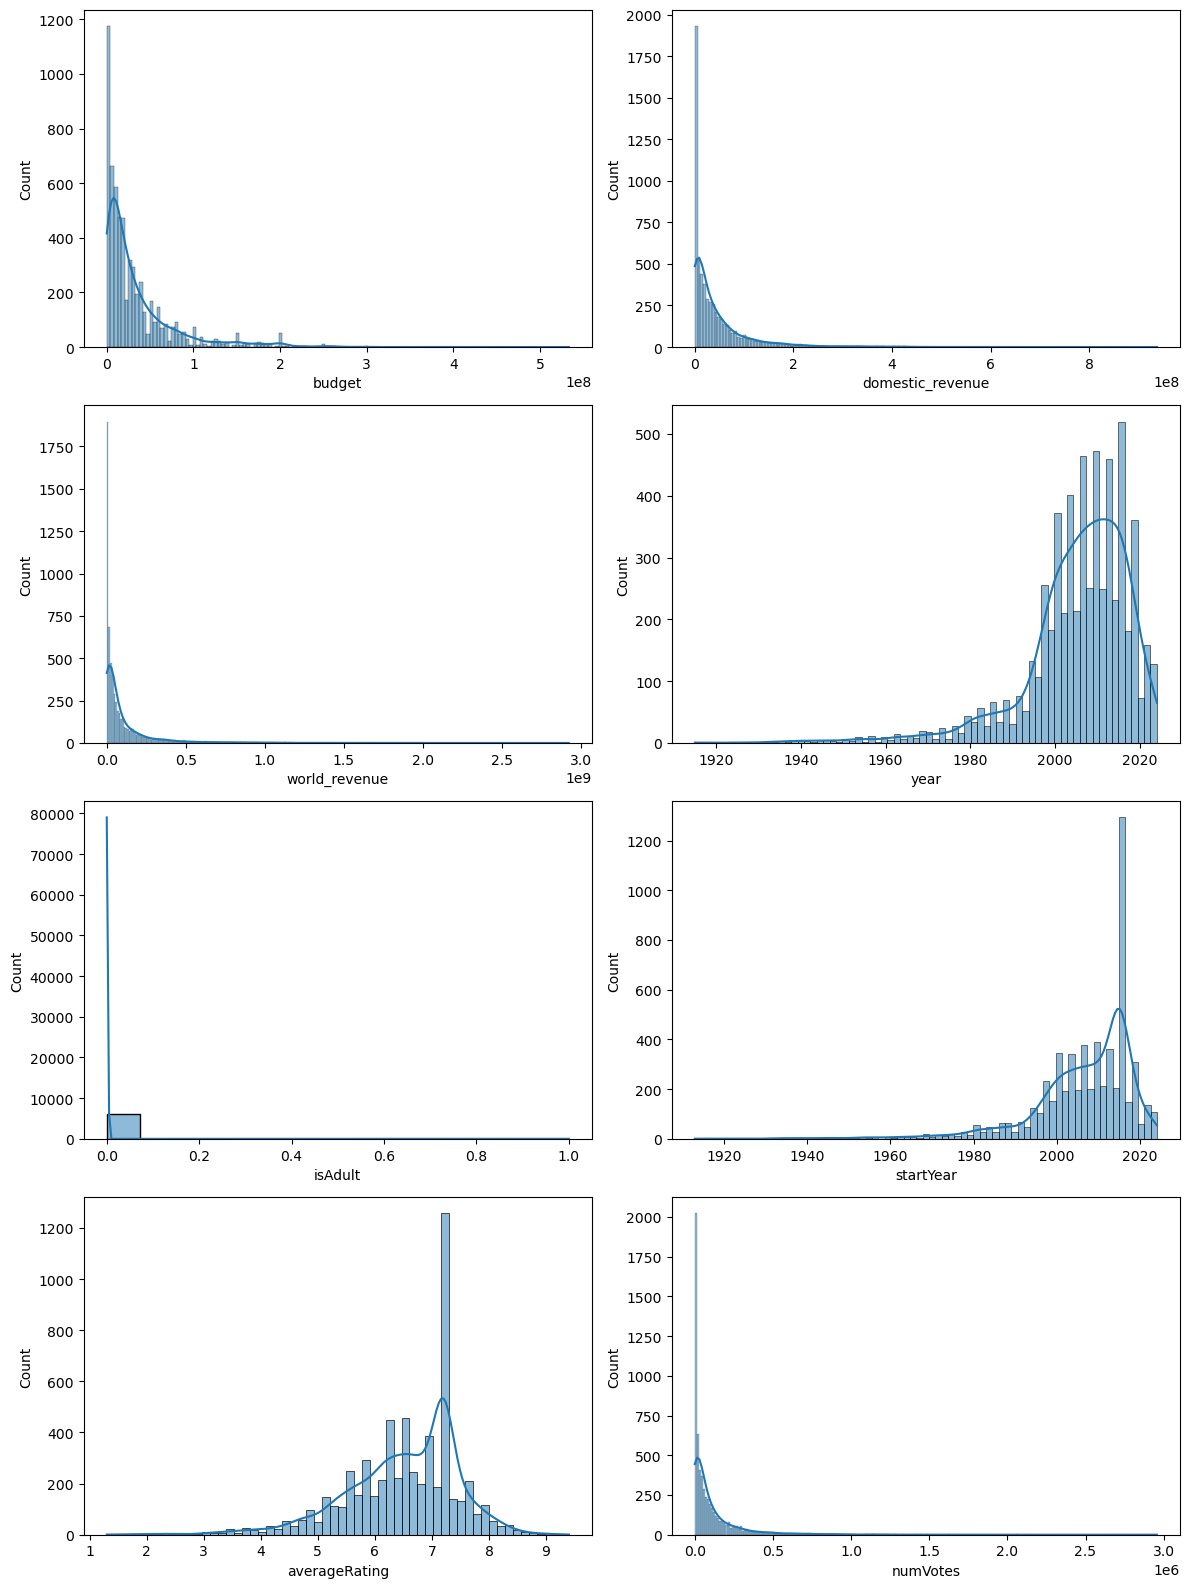

In [24]:
# Set up the grid
num_columns = len((model_df).columns)
cols = 2  # Number of columns in the grid
rows = (num_columns // cols) + (num_columns % cols > 0)  # Calculate rows needed
print(rows)

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten to easily index

# build histograms
for i, column in enumerate((model_df).columns):
    sns.histplot(model_df[column], kde=True, ax=axes[i])

#show the resulting hist
plt.tight_layout()
plt.show()

isAdult seems to be a binary column and may be useful for categorical modeling. However that is not the aim of this project so I will drop that column:

In [25]:
model_df = pd.read_csv('Data/model.csv')

In [26]:
model_df = model_df.drop(columns='isAdult')

Checking correlations:

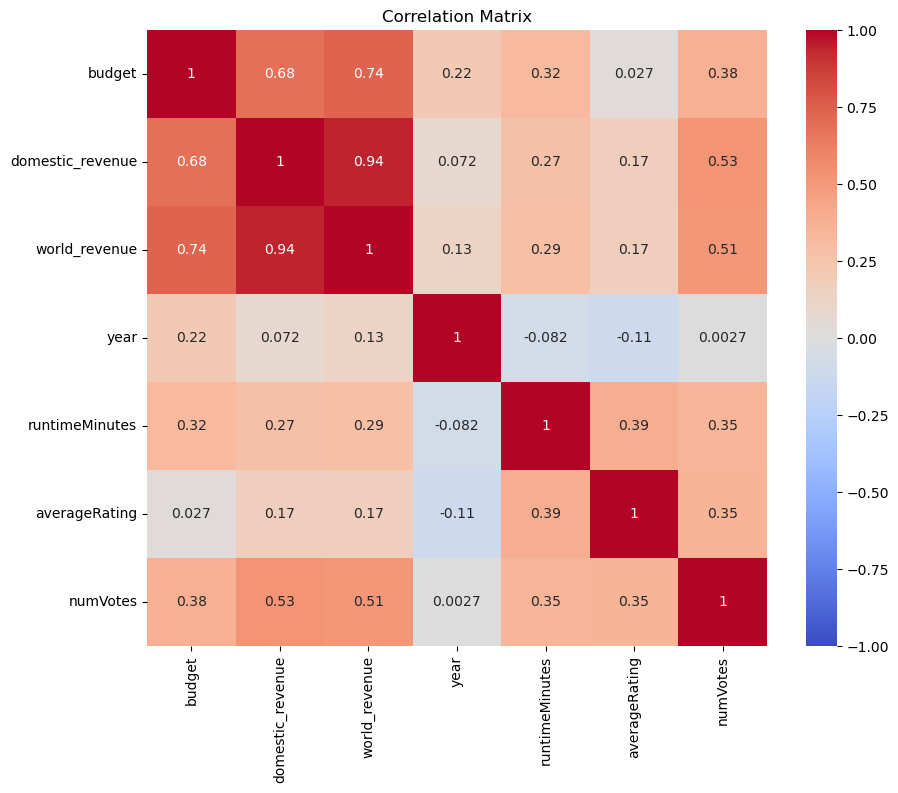

In [27]:
cor_matrix = model_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

Domestic Revenue and World Revenue are very closely related. As I want to predict World revenue, I will drop domestic revenue in the model since they are too closely related. This high correlation could cause redundancy moving foward.

There are some redundant columns in this data set. Dropping those before proceeding:

In [28]:
df = df.drop(columns='startYear')

Run time should be numeric. Changing data type:

In [29]:
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')
#show new correlation matrix
df.corr(numeric_only=True)

,budget,domestic_revenue,world_revenue,year,isAdult,runtimeMinutes,averageRating,numVotes
budget,1.000000,0.683269,0.735739,0.216806,-0.009681,0.316943,0.026970,0.379888
domestic_revenue,0.683269,1.000000,0.942330,0.071537,-0.000062,0.273801,0.169823,0.528997
world_revenue,0.735739,0.942330,1.000000,0.129769,-0.003701,0.286364,0.166862,0.511019
year,0.216806,0.071537,0.129769,1.000000,-0.032476,-0.082436,-0.114854,0.002709
isAdult,-0.009681,-0.000062,-0.003701,-0.032476,1.000000,-0.032769,-0.019318,-0.006374
runtimeMinutes,0.316943,0.273801,0.286364,-0.082436,-0.032769,1.000000,0.394158,0.348231
averageRating,0.026970,0.169823,0.166862,-0.114854,-0.019318,0.394158,1.000000,0.354898
numVotes,0.379888,0.528997,0.511019,0.002709,-0.006374,0.348231,0.354898,1.000000


Now that we have seen the distribution and correlations of the values in this dataframe, lets try an initial model:

In [30]:
model_df.isnull().sum()

budget                0
domestic_revenue      0
world_revenue         0
year                  0
runtimeMinutes      908
averageRating         0
numVotes              0
dtype: int64

There are several nulls in the runtime column. As this makes up a significant portion of the data (~12%) I will impute these nulls with the median value from the column. From above, the runtime data is fairly normally distributed, so the median should be a viable option for imputing the nulls:

In [31]:
model_df['runtimeMinutes'] = model_df['runtimeMinutes'].fillna(model_df['runtimeMinutes'].median())

model.csv saved to data folder:

In [32]:
model_df.to_csv('model.csv',index=False)